In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [47]:
!pip install plotly
!pip install lightgbm
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: C:\Users\fsepehrm24\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: C:\Users\fsepehrm24\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: C:\Users\fsepehrm24\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [48]:
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# Load the dataset
stress_data = pd.read_csv("Data/stress_detection.csv")
print(stress_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   participant_id     3000 non-null   int64  
 1   day                3000 non-null   int64  
 2   PSS_score          3000 non-null   int64  
 3   Openness           3000 non-null   float64
 4   Conscientiousness  3000 non-null   float64
 5   Extraversion       3000 non-null   float64
 6   Agreeableness      3000 non-null   float64
 7   Neuroticism        3000 non-null   float64
 8   sleep_time         3000 non-null   float64
 9   wake_time          3000 non-null   float64
 10  sleep_duration     3000 non-null   float64
 11  PSQI_score         3000 non-null   int64  
 12  call_duration      3000 non-null   float64
 13  num_calls          3000 non-null   int64  
 14  num_sms            3000 non-null   int64  
 15  screen_on_time     3000 non-null   float64
 16  skin_conductance   3000 

above code gives a summary of:

Number of rows (3000)

Number of columns (20)

Data types (mostly float64 and int64)

Non-null counts (no missing values here)

In [50]:
# Optional: Categorize into low vs high stress
stress_data['stress_label'] = (stress_data['PSS_score'] > 20).astype(int)
print(stress_data[['PSS_score', 'stress_label']])

      PSS_score  stress_label
0            34             1
1            37             1
2            30             1
3            16             0
4            32             1
...         ...           ...
2995         30             1
2996         33             1
2997         30             1
2998         28             1
2999         10             0

[3000 rows x 2 columns]


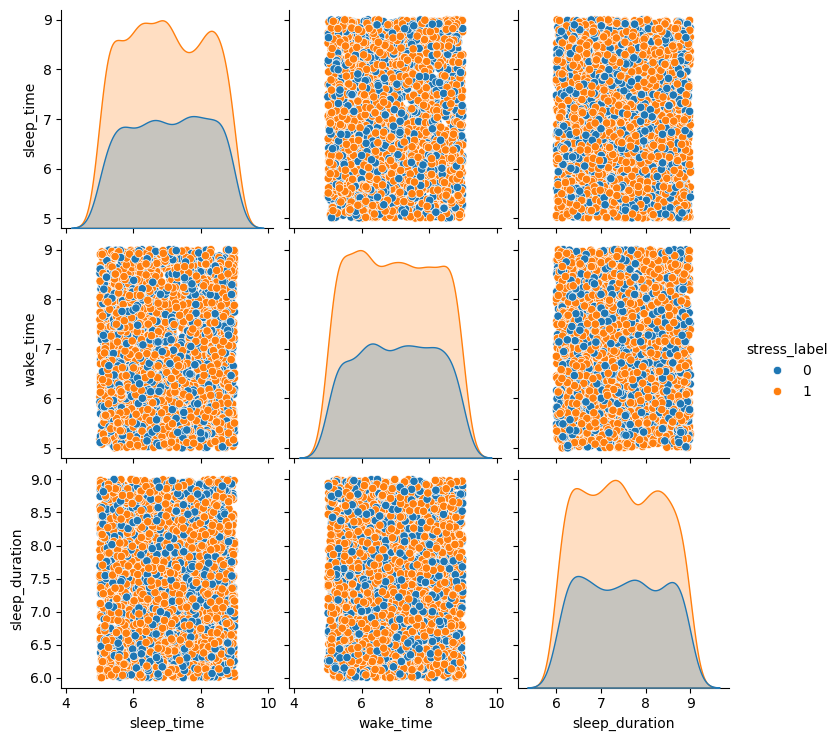

In [51]:
sns.pairplot(stress_data[['stress_label','sleep_time','wake_time','sleep_duration']], hue="stress_label")

In [52]:
#Checking for Missing Data
print(stress_data.isna().sum())

participant_id       0
day                  0
PSS_score            0
Openness             0
Conscientiousness    0
Extraversion         0
Agreeableness        0
Neuroticism          0
sleep_time           0
wake_time            0
sleep_duration       0
PSQI_score           0
call_duration        0
num_calls            0
num_sms              0
screen_on_time       0
skin_conductance     0
accelerometer        0
mobility_radius      0
mobility_distance    0
stress_label         0
dtype: int64


Axes(0.125,0.11;0.62x0.77)


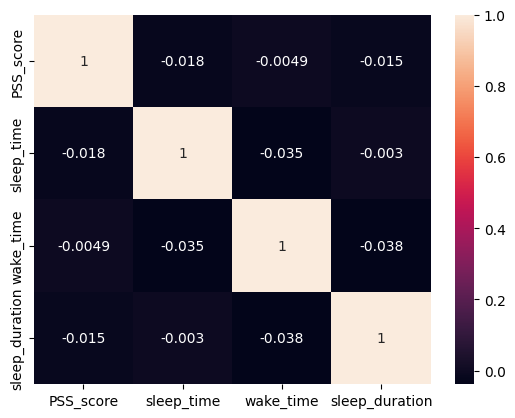

In [54]:
print(sns.heatmap(stress_data[['PSS_score','sleep_time','wake_time','sleep_duration']].corr(), annot=True))

In [53]:
#person with id=1
id1 = stress_data[stress_data["participant_id"] == 1]
id1


,participant_id,day,PSS_score,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,sleep_time,wake_time,...,PSQI_score,call_duration,num_calls,num_sms,screen_on_time,skin_conductance,accelerometer,mobility_radius,mobility_distance,stress_label
0,1,1,34,2.322732,4.332193,1.185878,1.570213,3.782094,7.726792,5.190660,...,1,3.924527,12,32,10.703714,3.115730,0.161717,1.145179,2.196851,1
1,1,2,37,1.761436,3.254120,3.907281,4.072512,1.997145,7.312674,6.170717,...,4,58.318004,3,41,11.012939,0.959144,0.985587,1.021133,0.737825,1
2,1,3,30,3.025887,1.855002,2.045900,2.317493,3.619225,6.992060,5.318825,...,1,4.941043,4,48,4.877372,3.311629,1.877445,0.478179,0.911673,1
3,1,4,16,1.948370,4.966676,3.345225,1.607756,3.583524,8.886914,8.061075,...,3,0.295373,11,38,3.462956,0.625721,0.494921,0.630549,3.911418,0
4,1,5,32,3.343484,2.065936,3.137843,2.118061,2.567347,7.811705,7.312145,...,3,22.300571,17,17,4.861046,0.622609,1.342600,0.254090,1.605132,1
5,1,6,28,3.319140,4.141191,2.934202,1.416814,3.901544,8.799540,8.602325,...,4,55.459850,4,14,7.883468,4.901522,0.539268,1.461828,3.927181,1
6,1,7,39,2.893623,1.909251,3.731296,1.914267,3.165248,8.251176,8.029626,...,3,28.972359,4,3,9.096195,4.949273,1.486665,1.017602,2.740476,1
7,1,8,19,1.437202,1.816345,4.170692,3.716547,1.645627,8.433565,6.427281,...,3,47.342943,3,37,1.395497,3.012052,1.853035,0.546391,4.715504,0
8,1,9,22,3.279301,3.968729,1.764378,4.443119,1.326407,8.307685,8.034998,...,1,36.755438,3,16,5.377928,3.147191,1.357896,0.475016,1.546705,1
9,1,10,15,4.604192,4.025498,1.137726,3.677640,4.682931,8.097748,7.456953,...,4,3.391413,7,31,7.723512,1.241725,2.356403,0.794373,2.206041,0


how stress varies for this participant across days:

Is stress mostly low? High? Bimodal?

Are there consistent patterns or wide fluctuations?

<Axes: xlabel='PSS_score', ylabel='Count'>

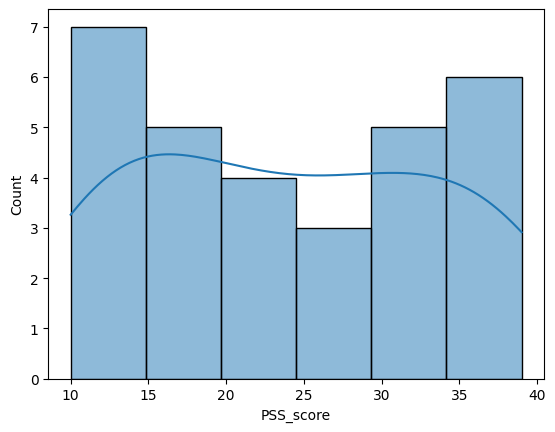

In [55]:
sns.histplot(id1["PSS_score"], kde=True)

visualize:

How stress interacts with personality traits (Openness, Conscientiousness, Extraversion).

Whether a certain trait aligns with higher/lower stress on some days.

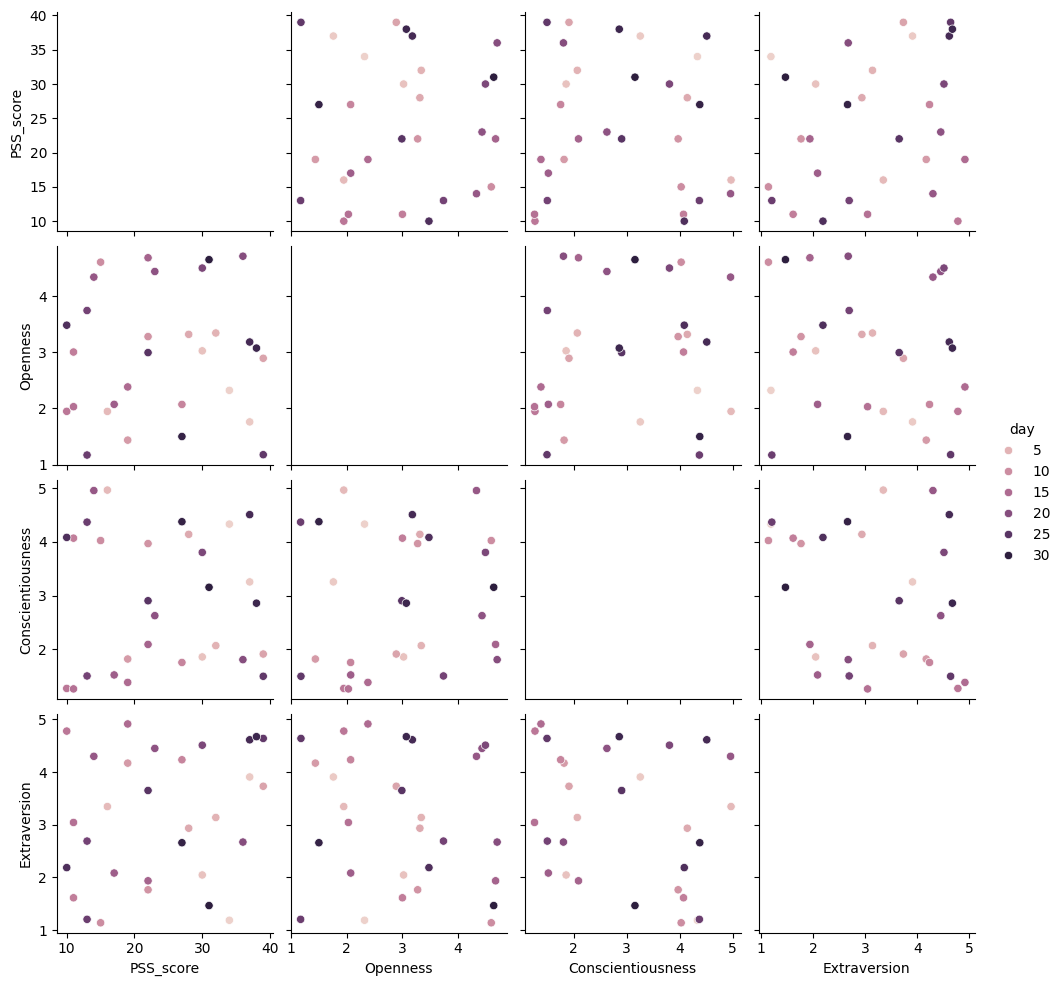

In [56]:
sns.pairplot(id1[["day",'PSS_score','Openness','Conscientiousness','Extraversion']], hue="day")

visualize:

How stress interacts with psychological traits (Neuroticism and Agreeableness).

Neuroticism is often linked with higher stress, so this might reveal a clear relationship in the scatter plots.

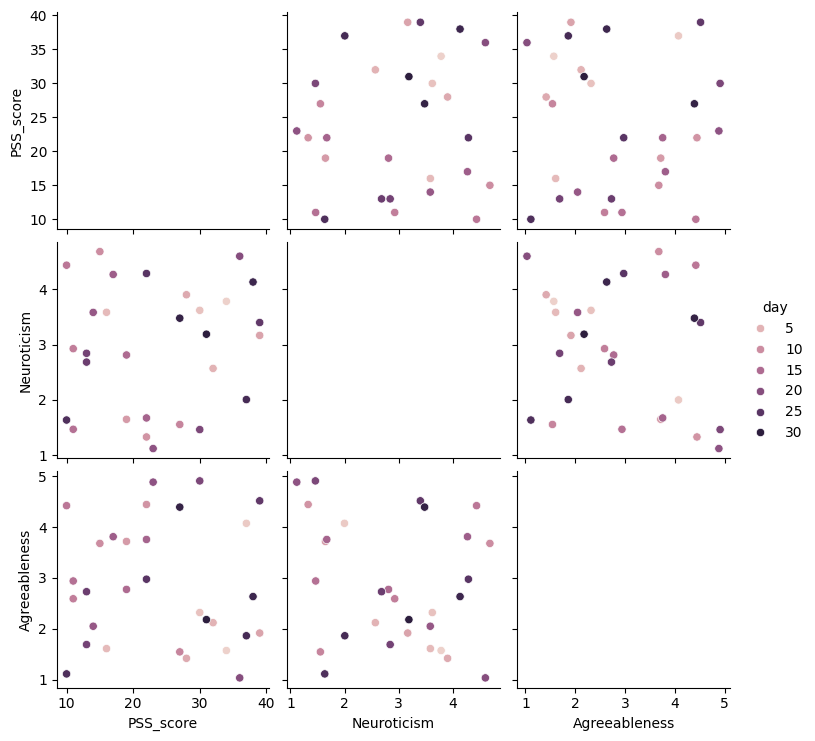

In [57]:
# Identify patterns and correlations between psychological traits and stress levels
sns.pairplot(id1[["day",'PSS_score','Neuroticism','Agreeableness']], hue="day")

visualize:

How stress interacts with sleep patterns (sleep_time, wake_time, sleep _duration).

<Axes: >

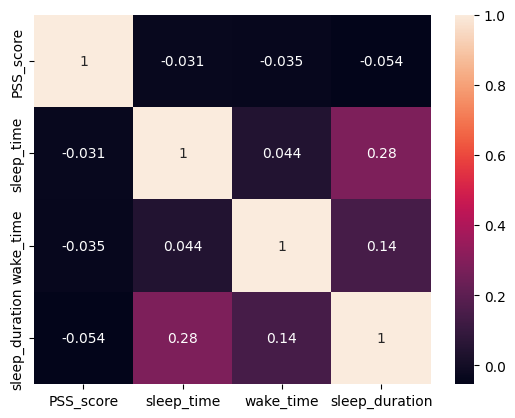

In [58]:
#identify relationships between stress and sleep patterns
sns.heatmap(id1[['PSS_score','sleep_time','wake_time','sleep_duration']].corr(), annot=True)

In [59]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop non-feature columns and create the feature matrix X
X = stress_data.drop(columns=['PSS_score', 'participant_id', 'day'])

# Define the target variable y
y = stress_data['PSS_score']

# Standardize the feature matrix
X = StandardScaler().fit_transform(X)

# Split into training and test datasets
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [62]:
models = {
    # A simple linear regression model assuming a linear relationship between inputs and output
    "Linear Regression": LinearRegression(),

    # A powerful ensemble method that uses many decision trees and averages their outputs for better accuracy
    "Random Forest": RandomForestRegressor(),

    # A single decision tree that splits data into branches based on feature thresholds
    "Decision Tree": DecisionTreeRegressor(),

    # A support vector regressor that tries to find a best-fit function within a given margin
    "Support Vector Machine": SVR(),

    # Predicts based on the average outcome of the 5 nearest data points in feature space
    "K Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),

    # A regression model that mixes L1 (sparse) and L2 (ridge) penalties for regularization
    "Elastic Net": ElasticNet(),

    # A gradient boosting model from XGBoost, tuned here with:
    # - 1000 boosting rounds
    # - maximum tree depth of 4 (controls complexity)
    # - slow learning rate of 0.01 (for fine convergence)
    "XGBoost": XGBRegressor(n_estimators=1000, max_depth=4, learning_rate=0.01),

    # LightGBM is another gradient boosting framework optimized for speed and memory efficiency
    "LightGBM": LGBMRegressor(n_estimators=1000, learning_rate=0.01, verbose=0),

    # CatBoost is good with categorical data and needs minimal preprocessing
    # This model is also set to run for 1000 iterations with a small learning rate
    "CatBoost": CatBoostRegressor(n_estimators=1000, learning_rate=0.01, verbose=0)
}


automatically trains and evaluates multiple models using both:

a train/test split, and

cross-validation to ensure generalization.

In [63]:
def model_score(models=models):  # Defines a function that takes a dictionary of models
    model_scores = []  # Empty list to store evaluation results for each model

    for name, model in models.items():  # Iterate through each model in the dictionary
        model.fit(train_x, train_y)  # Train the model on the training data
        pred = model.predict(test_x)  # Predict target values on the test data

        r2 = r2_score(test_y, pred)  # Calculate R² score (how well the model explains the variance)
        rmse = np.sqrt(mean_squared_error(test_y, pred))  # Compute RMSE to assess prediction error

        # Perform 5-fold cross-validation on the full dataset (X, y)
        # Scoring metrics used: R² and negative RMSE (scikit-learn uses negative for loss-based metrics)
        cross_val_scores = cross_validate(
            model, X, y, cv=5, 
            scoring=['r2', 'neg_root_mean_squared_error']
        )

        # Store the evaluation results in a dictionary
        results = {
            "model": name,
            "R2": r2,  # R² on test set
            "RMSE": rmse,  # RMSE on test set
            "Cross Validation R2": cross_val_scores['test_r2'].mean(),  # Average CV R²
            "Cross Validation RMSE": np.mean(-cross_val_scores['test_neg_root_mean_squared_error'])  # Average CV RMSE (negated)
        }

        model_scores.append(results)  # Add results to the overall list

    return pd.DataFrame(model_scores)  # Return the scores as a DataFrame for easy viewing


In [64]:
model_score(models=models)

,model,R2,RMSE,Cross Validation R2,Cross Validation RMSE
0,Linear Regression,0.698751,4.609132,0.691942,4.769596
1,Random Forest,0.691178,4.666702,0.685281,4.820022
2,Decision Tree,0.374551,6.641285,0.392322,6.697623
3,Support Vector Machine,0.648571,4.978230,0.645765,5.115465
4,K Nearest Neighbors,0.594228,5.349305,0.581923,5.556206
5,Elastic Net,0.605566,5.274036,0.594723,5.476587
6,XGBoost,0.686331,4.703182,0.677269,4.883019
7,LightGBM,0.684786,4.714756,0.669013,4.943899
8,CatBoost,0.697544,4.618352,0.688890,4.793351


In [65]:
best_models = {
    "XGBoost": XGBRegressor(n_estimators=1000,max_depth = 4, learning_rate=0.01),
    "LightGBM": LGBMRegressor(n_estimators=1000, learning_rate=0.01, verbose=0),
    "CatBoost": CatBoostRegressor(n_estimators=1000, learning_rate= 0.01,verbose=0)
}

In [66]:
from sklearn.ensemble import VotingRegressor

model = VotingRegressor(estimators=[(name,model) for name, model in best_models.items()])
model.fit(train_x, train_y)
pred = model.predict(test_x)
r2 = r2_score(test_y, pred)
rmse = np.sqrt(mean_squared_error(test_y, pred))
cross_val_scores = cross_validate(model, X, y, cv=5, scoring=['r2', 'neg_root_mean_squared_error'])

results = {
    "model": "Voting Regressor",
    "R2": r2,
    "RMSE": rmse,
    "Cross Validation R2": cross_val_scores['test_r2'].mean(),
    "Cross Validation RMSE": np.mean(-cross_val_scores['test_neg_root_mean_squared_error'])
}

pd.DataFrame(results, index=[0])

,model,R2,RMSE,Cross Validation R2,Cross Validation RMSE
0,Voting Regressor,0.694394,4.642341,0.682759,4.840593
